In [1]:
import pandas as pd
file = pd.read_csv("C:/Users/lll/Downloads/XMLtoCSV/change3/0758(862).csv",encoding='gbk')
file.head()

,GUID,posID,frame,足首ロールL,足首ロールR,足首ピッチL,手首ヨーL,足首ピッチR,手首ヨーR,膝ピッチL,...,肩ロールL,ヒップロールR,肩ロールR,ヒップヨーL,頭萌,ヒップヨーR,頭ヨー,肩ピッチL,頭ピッチ,肩ピッチR
0,a01ab563-af2f-4a75-b2c0-8ec06dfe8ee3,0,144,-80,-32,1765,-3217,-1793,3534,2748,...,-2335,117,1918,39,-41,-143,178,941,-310,-1184
1,eb0c5925-1589-4dfc-b2a5-02c0f52cf9cb,0,42,-80,-32,1765,-3217,-1793,3534,2951,...,-2335,107,1918,59,-41,-152,148,941,-178,-1184
2,a1af0e5a-20e4-4c8a-bf72-81d4d9e68b0f,0,98,-80,-32,1765,-3217,-1793,3534,2951,...,-2335,107,1918,59,-41,-152,148,941,-178,-1184
3,8f236c7d-dab1-455e-81e2-cd32a115ead2,0,124,-108,36,1784,-3217,-1821,3534,3124,...,-2335,88,1918,68,-50,-143,109,941,-93,-1184
4,4f655d00-2f7b-472b-9b50-9feb83196ec6,0,27,-89,122,1803,-3217,-1811,3534,3134,...,-2335,59,1918,146,-50,-55,40,941,20,-1184


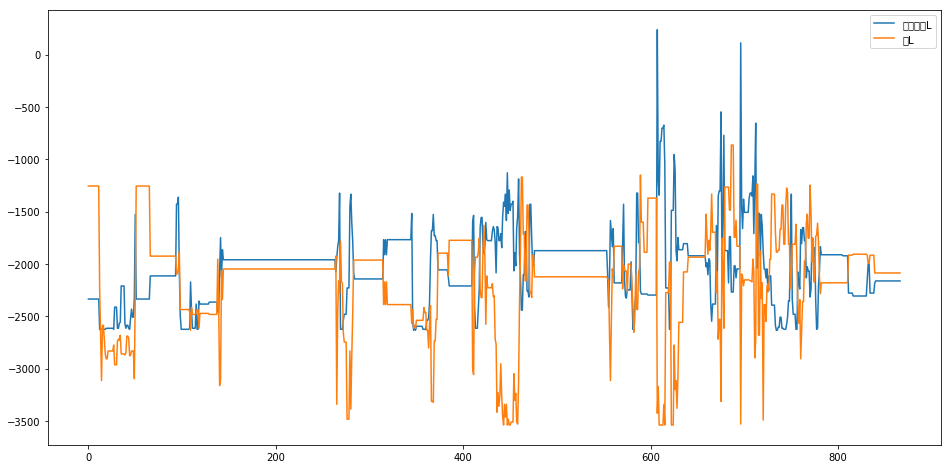

In [3]:
# Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
%matplotlib inline
from pandas import read_csv
import pandas as pd

plt.figure(figsize=(16,8))
plt.plot(file["肩ロールL"], label = '肩ロールL')
plt.plot(file["肘L"], label = '肘L')
#plt.plot(orgin_neck["X"], label = 'origin_neck')

plt.legend()
plt.show()

In [22]:
a = 0
b = 0
for i in range(file['frame'].shape[0]):
    a += file['frame'][i+1]
    b = a/66.6
    print(b)

1.38138138138
2.34234234234
3.72372372372
4.35435435435
5.61561561562
6.12612612613
7.08708708709
8.04804804805
8.52852852853
8.84384384384
10.4504504505
14.2792792793
17.7177177177
20.3903903904
21.2462462462
21.4414414414
21.996996997
22.1621621622
22.4624624625
22.957957958
23.5435435435
23.963963964
24.9249249249
26.5315315315
27.8078078078
28.4384384384
29.1291291291
29.96996997
30.6006006006
31.021021021
32.6276276276
34.3843843844
38.2132132132
41.1711711712
41.6516516517
41.8318318318
42.5675675676
42.987987988
43.5585585586
43.978978979
44.1591591592
44.4744744745
44.8498498498
45.4804804805
45.9309309309
46.1861861862
46.3663663664
47.2072072072
47.3573573574
47.4774774775
47.5675675676
47.6576576577
47.7477477477
47.8378378378
48.3483483483
50.015015015
50.4954954955
51.1861861862
51.981981982
54.8348348348
55.7957957958
56.7567567568
58.6786786787
59.96996997
61.6066066066
62.5825825826
63.5585585586
64.024024024
64.8498498498
65.5105105105
65.7807807808
66.0960960961
66.63

KeyError: 349

In [ ]:
#! python3
import xml.etree.cElementTree as ET
import csv
import re


filepath = "1.xml"
xname =filepath.strip('xml')
tree = ET.ElementTree(file=filepath)
tree.getroot()
cname = xname +"csv"
with open("test1.csv","w",newline='') as csvfile: 
    writer = csv.writer(csvfile)
    writer.writerow(["GUID","posID","frame","足首ロールL","足首ロールR","足首ピッチL","手首ヨーL","足首ピッチR","手首ヨーR","膝ピッチL","肘L","腿ピッチL","肘R","腿ピッチL",
                    "上腕ヨーL","腿ピッチR","上腕ヨーR","ヒップロールL","肩ロールL","ヒップロールR","肩ロールR","ヒップヨーL","頭萌","ヒップヨーR","頭ヨー",
                    "肩ピッチL","頭ピッチ","肩ピッチR"])

def string_reverse1(string):  
    return string[::-1]  
def hasNumbers(inputString):
	return bool(re.search(r'\d', inputString))
	
for elem in tree.iter():
    ntext = elem.text
    at = elem.attrib.values()  
    if elem.tag =='GUID':
        guid = elem.text
    if elem.tag == 'Text':
        pos = elem.text
        pos = re.findall("\d+",pos)[0]
        pos = int(pos)    
    if 'xsd:string' in at:       
            nstr = ntext.split() 
            count = 0
            dtext = ""
            for el in nstr :        
                count = count+1
                if count>=9  and count<= 58 :
                    dtext = dtext+el
                    print(el,end=" ")
            rd = string_reverse1(dtext)#整体从后向前
            rdlist = list(rd) 
            print(len(rdlist))
            nlist1 =[]
            nlist2 =[]
            cindex = 0
            for r in rdlist:
                cindex = cindex+1    
                if cindex%2!=0:          
                    nlist2.append(r)
                else:
                    nlist1.append(r)          
            print("nlist1")
            print(nlist1,len(nlist1))    
            print("nlist2")
            print(nlist2,len(nlist2))
            from itertools import chain
            list(chain.from_iterable(zip(nlist1, nlist2)))
            nlist3= list(chain(*zip(nlist1, nlist2)))            
            lstext = list(nlist3)
            lcount = 0
            data = "" 
            for l in lstext:
                lcount = lcount+1  
                data = data+l          
                if lcount%4==0:    
                     data = data+" "
            print(data)    
    if elem.tag == 'Hint':
            frame = elem.text
            frame = str(frame)
            if hasNumbers(frame):
                frame = re.findall("\d+",frame)[0]
                fra = int(frame)
                nlist4 = []
                nlist4.append(guid)
                nlist4.append(pos)
                nlist4.append(fra)
                nstr = data.split()  
                for i in nstr:
                    ni= int(i,16)
                    nn = ni-7500
                    nlist4.append(nn)
                    print(nn,end=" ")
                print ("nlist4")
                print (nlist4)
                print (fra)
            else:
                continue 

            if(len(nlist4)>=28):
                with open("test2.csv","w",newline="") as csvfile: 
                    writer = csv.writer(csvfile)
                    writer.writerows([nlist4])
                    csvfile.close()
                with open("test1.csv","ab") as csvfile: 
                    csvfile.write(open('test2.csv','rb').read())
                    csvfile.close()

 # if guid != {}& pos != {}& frame != {}:       

                
    